In [136]:
import numpy as np 
import pandas as pd

#import basic visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [137]:
# Input data files are available in the read-only "../input/" directory
# For example, running this  will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [236]:
#read in data 
df_agg = pd.read_csv('../data/Aggregated_Metrics_By_Video.csv',encoding='utf-8')
df_agg_country_sub = pd.read_csv('../data/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv', encoding='utf-8')
df_ts = pd.read_csv('../data/Video_Performance_Over_Time.csv', encoding='utf-8')
df_comments = pd.read_csv('../data/All_Comments_Final.csv', encoding='utf-8')

In [139]:
#look at columns for each dataframe 
print(df_agg.columns)
print(df_agg_country_sub.columns)
print(df_ts.columns)
print(df_comments.columns)


Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

In [140]:
#the column headers have some extra non-ascii characters, we need to clean them up before we do our analysis

newcols = [x.encode("ascii", "ignore").decode("utf-8") for x in df_agg.columns]
df_agg.columns = newcols

In [141]:
df_agg.columns

Index(['Video', 'Video title', 'Video publish time', 'Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost', 'Subscribers gained',
       'RPM (USD)', 'CPM (USD)', 'Average percentage viewed (%)',
       'Average view duration', 'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions',
       'Impressions click-through rate (%)'],
      dtype='object')

In [142]:
df_agg.describe()

,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


### Single variable plots
After looking at the descriptive statistics, we may want to explore our numeric features more. To do this, we like to use single variable plots. These can help us understand the distributions of our data. If our data doesn't follow a normal distribution, we may want to make some transform it so it can be used by specific types of models like linear regresison. 

Looking at these charts can also help us to evaluate if there are outliers present in our data. 

First, we will look at histograms of our data. These help us to see skew as well as some outliers.

Next, we will explore some box plots to see if they tell us additional information

Finally, we will explore some distribution plots for categorical variables.

<Axes: >

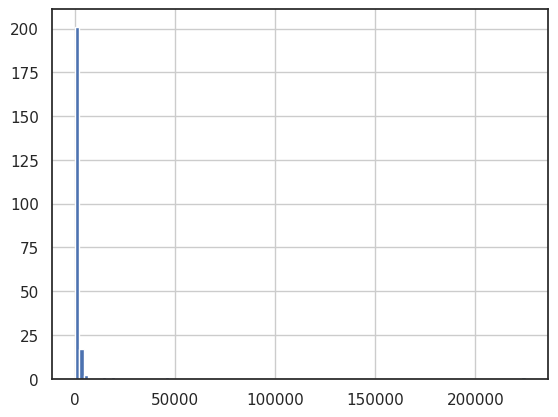

In [143]:
df_agg.Likes.hist(bins=100)

(array([21., 26., 28., 29., 45., 38., 19., 10.,  3.,  5.]),
 array([ 5.23 , 12.367, 19.504, 26.641, 33.778, 40.915, 48.052, 55.189,
        62.326, 69.463, 76.6  ]),
 <BarContainer object of 10 artists>)

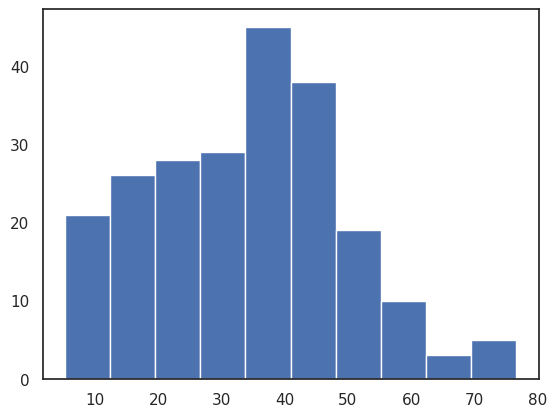

In [144]:
plt.hist(df_agg['Average percentage viewed (%)'])

<Axes: >

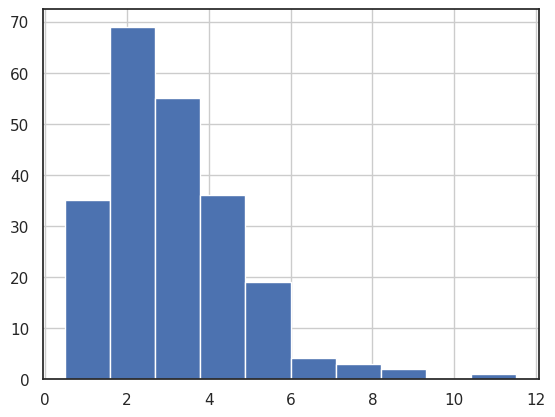

In [145]:
df_agg['Impressions click-through rate (%)'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7612e46d6d80>,
 'caps': [<matplotlib.lines.Line2D at 0x7612e46d7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7612e45fe480>],
 'medians': [<matplotlib.lines.Line2D at 0x7612e46d78c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7612e46d7b90>],
 'means': []}

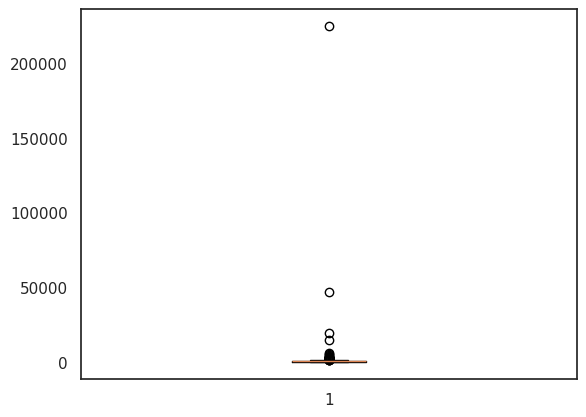

In [146]:
plt.boxplot(df_agg['Likes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7612e46b3a40>,
 'caps': [<matplotlib.lines.Line2D at 0x7612e46b3fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7612e46b37a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7612e467c560>],
 'fliers': [<matplotlib.lines.Line2D at 0x7612e467c860>],
 'means': []}

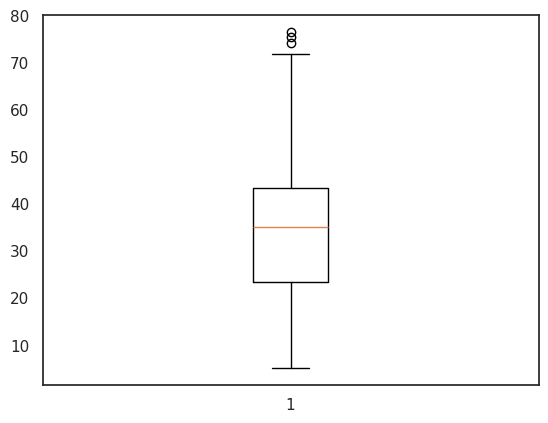

In [147]:
plt.boxplot(df_agg['Average percentage viewed (%)'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7612e44e9460>,
 'caps': [<matplotlib.lines.Line2D at 0x7612e44e99a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7612e44e9220>],
 'medians': [<matplotlib.lines.Line2D at 0x7612e44e9ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7612e44ea1b0>],
 'means': []}

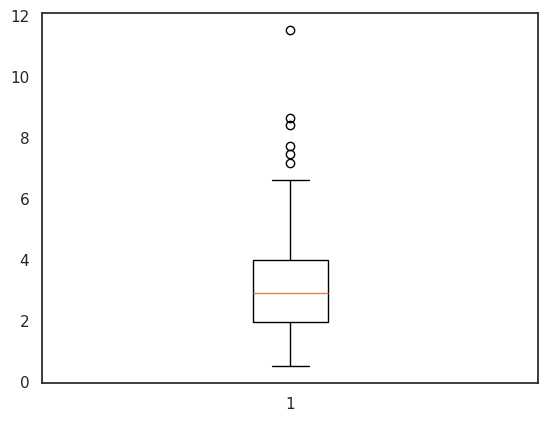

In [148]:
plt.boxplot(df_agg['Impressions click-through rate (%)'])

In [149]:
#To show how to do this with categorical data, let's make a categorical column.
#We can take our revenue data and make it into different categories that are relevant to me. Usually I'm interested if videos have made less than $100, 
#between $100-1000 and over $1000. 

#make bins from 0-100, 100-1000, and greater than 1000

bin = pd.IntervalIndex.from_tuples([(0,100), (100, 1000), (1000, float("inf"))])

df_agg["rev_buckets"] = pd.cut(df_agg['Your estimated revenue (USD)'], bin)



<Axes: xlabel='rev_buckets'>

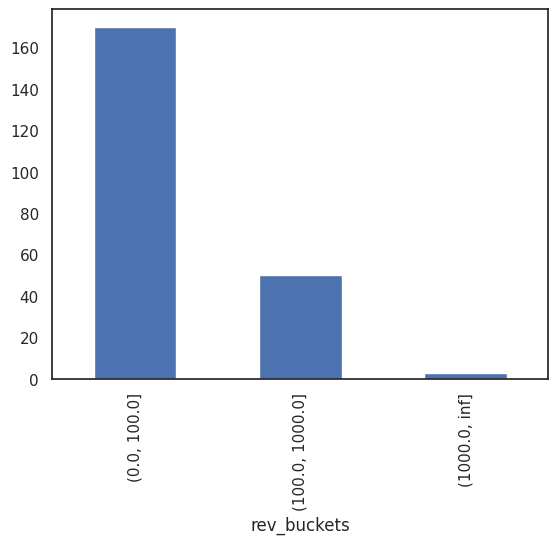

In [150]:
#get count of number of videos by reveune bucket
rev_values = df_agg['rev_buckets'].value_counts()
rev_values.plot.bar()

## Relationships and Multi-Variable Plots
A big part of exploratory data analysis is seeing how mutliple variables are related. We can use multiple different types of plots to easily see these relationships. By understanding these relationships we can start to udnerstand which features may be releated or can serve to predict others. In my opinion, this is where buisiness value starts to emerge. 

In this part we will explore:

1) Scatter plots

2) Correlation Matrices 

3) Pivot Tables

4) Bar Charts

5) Line Charts
 

### Scatter Plots

We use these to see if there is a relationship between two datapoints. 

Let's take a look  at a few variables and see if they may be correlated. We will explore if the average percentage viewed of the video is related to the cost per milli on the video (the amount youtube makes for 1000 views)


Text(0.5, 0, 'Avarege percentage viewed of the video')

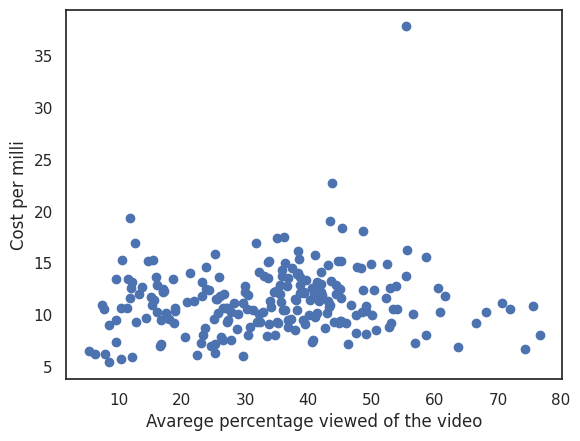

In [151]:
#create plot with matplotlib
plt.scatter(df_agg['Average percentage viewed (%)'], df_agg["CPM (USD)"])
plt.ylabel("Cost per milli")
plt.xlabel("Avarege percentage viewed of the video")

Text(0.5, 1.0, 'corelation of CPM with avg % viewed')

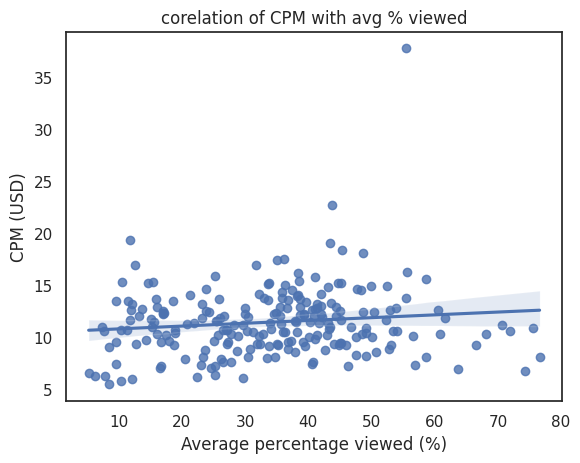

In [152]:
#let's do the same thing with seaborn so we can see a trendline. This will be easier for us to build multiple of these 

sns.regplot(x = 'Average percentage viewed (%)', y = "CPM (USD)", data=df_agg)

plt.title("corelation of CPM with avg % viewed")

<Axes: xlabel='RPM (USD)', ylabel='CPM (USD)'>

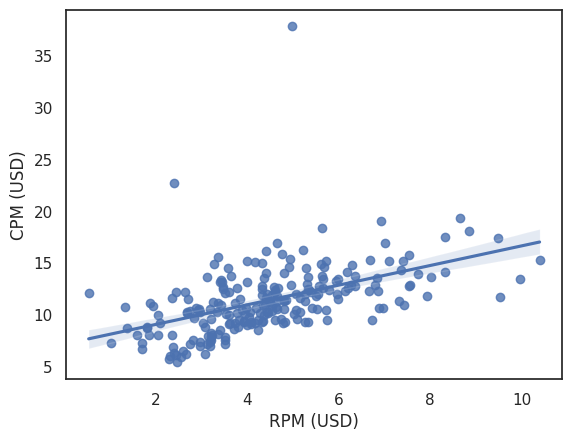

In [153]:
#Let's try another. How do variables RPM and CPM match up. RPM is how much the youtuber makes for an add. Again CPM is how much youtube sells the ad for. 

sns.regplot(x="RPM (USD)", y = "CPM (USD)", data=df_agg)

### Correlation Matrices 

Scatter plots are great for comparing two variables. Often we have many different variables that we want to see relationships between. 


In this case we would use a correlation matrix. Let's do a correlation matrix for all of our value in the dataset. 


In [154]:
df_agg1 = df_agg.copy()

In [155]:
df_agg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Video                               224 non-null    object  
 1   Video title                         223 non-null    object  
 2   Video publish time                  223 non-null    object  
 3   Comments added                      224 non-null    int64   
 4   Shares                              224 non-null    int64   
 5   Dislikes                            224 non-null    int64   
 6   Likes                               224 non-null    int64   
 7   Subscribers lost                    224 non-null    int64   
 8   Subscribers gained                  224 non-null    int64   
 9   RPM (USD)                           224 non-null    float64 
 10  CPM (USD)                           222 non-null    float64 
 11  Average percentage viewed (%)   

In [156]:
obj = df_agg1.select_dtypes(include='O')


In [157]:
df_agg1.drop(columns = obj, inplace = True)

In [158]:
# The reason we drop rev_buckets is it throw 'pandas._libs.interval.Interval' error because we created above using pd.cut() method.
df_agg1.drop(columns = "rev_buckets", inplace =True)

In [159]:
df_agg1.isnull().sum()

Comments added                        0
Shares                                0
Dislikes                              0
Likes                                 0
Subscribers lost                      0
Subscribers gained                    0
RPM (USD)                             0
CPM (USD)                             2
Average percentage viewed (%)         0
Views                                 0
Watch time (hours)                    0
Subscribers                           0
Your estimated revenue (USD)          0
Impressions                           0
Impressions click-through rate (%)    0
dtype: int64

In [160]:
df_agg1.dropna(axis=0, inplace=True)

In [161]:
df_agg1.isnull().sum()

Comments added                        0
Shares                                0
Dislikes                              0
Likes                                 0
Subscribers lost                      0
Subscribers gained                    0
RPM (USD)                             0
CPM (USD)                             0
Average percentage viewed (%)         0
Views                                 0
Watch time (hours)                    0
Subscribers                           0
Your estimated revenue (USD)          0
Impressions                           0
Impressions click-through rate (%)    0
dtype: int64

In [162]:
corr = df_agg1.corr()
corr

,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
Comments added,1.000000,0.977153,0.977891,0.984089,0.996079,0.987108,0.045314,-0.001685,-0.055309,0.983855,0.986262,0.978916,0.975792,0.976927,0.013376
Shares,0.977153,1.000000,0.990025,0.998383,0.966253,0.996493,0.060516,0.016995,-0.039769,0.997412,0.994749,0.997727,0.995914,0.995380,0.027571
Dislikes,0.977891,0.990025,1.000000,0.991311,0.968549,0.993624,0.079003,0.023663,-0.037492,0.994842,0.993381,0.993626,0.995343,0.997024,0.023960
Likes,0.984089,0.998383,0.991311,1.000000,0.975049,0.998697,0.054611,0.014750,-0.030625,0.998812,0.996830,0.998322,0.995943,0.995345,0.030833
Subscribers lost,0.996079,0.966253,0.968549,0.975049,1.000000,0.979646,0.031979,0.010748,-0.034388,0.974480,0.977391,0.968746,0.964212,0.966370,0.005230
Subscribers gained,0.987108,0.996493,0.993624,0.998697,0.979646,1.000000,0.049760,0.016296,-0.032664,0.999179,0.997863,0.998821,0.996795,0.996577,0.018906
RPM (USD),0.045314,0.060516,0.079003,0.054611,0.031979,0.049760,1.000000,0.495945,-0.154435,0.058883,0.066678,0.053757,0.076497,0.075421,0.105833
CPM (USD),-0.001685,0.016995,0.023663,0.014750,0.010748,0.016296,0.495945,1.000000,0.122048,0.019261,0.025444,0.017539,0.029411,0.022872,0.036318
Average percentage viewed (%),-0.055309,-0.039769,-0.037492,-0.030625,-0.034388,-0.032664,-0.154435,0.122048,1.000000,-0.035127,-0.045560,-0.032048,-0.035424,-0.040263,0.134449
Views,0.983855,0.997412,0.994842,0.998812,0.974480,0.999179,0.058883,0.019261,-0.035127,1.000000,0.998863,0.999055,0.998504,0.997535,0.036138


<Axes: >

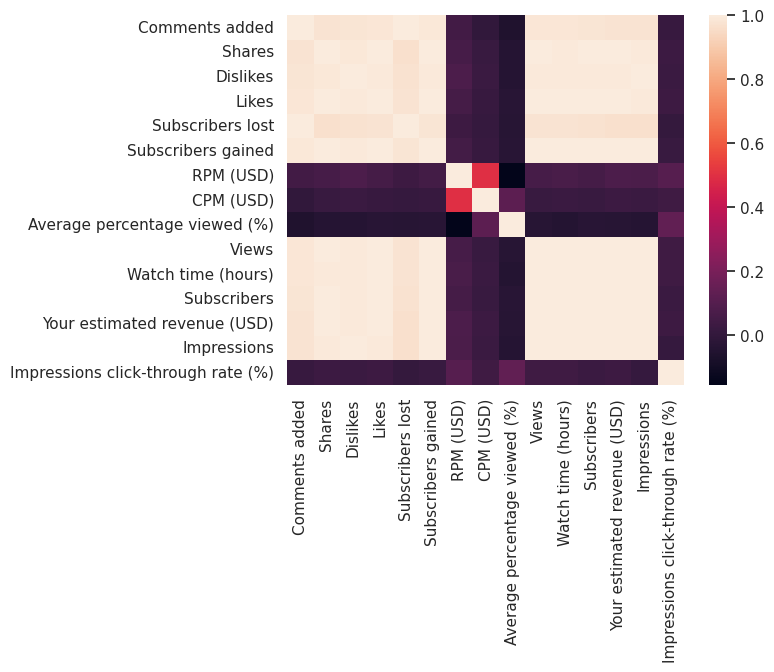

In [163]:
sns.heatmap(corr)

this looks pretty awful, let's improve it's look

<Axes: >

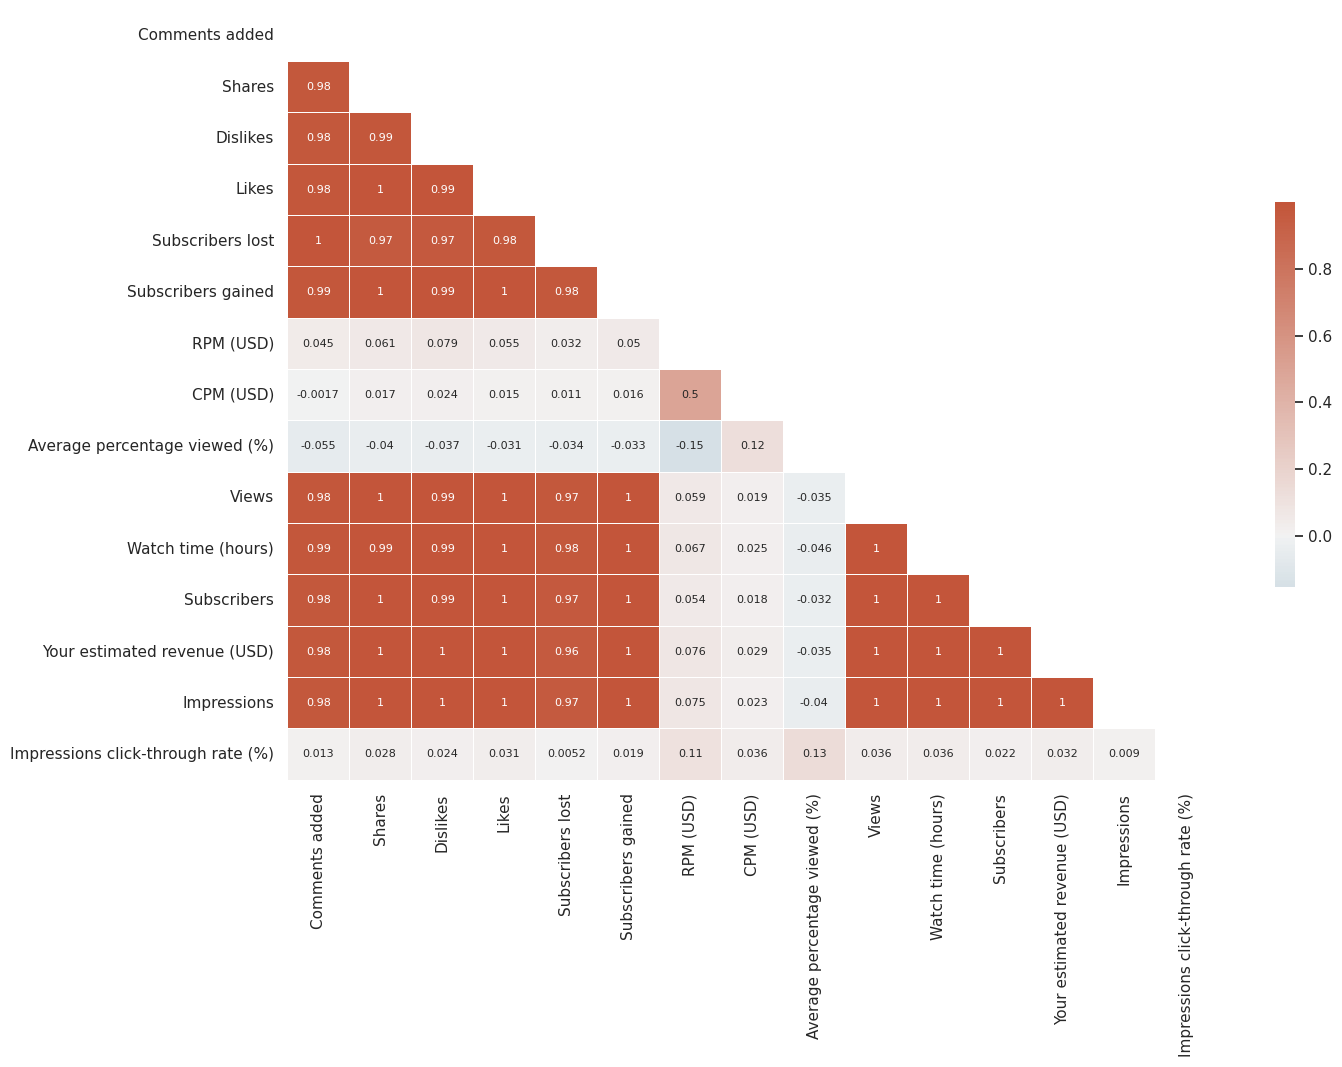

In [164]:
#A better example (formatting used in below chart) - https://seaborn.pydata.org/examples/many_pairwise_correlations.html 
sns.set_theme(style="white")

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure 
f,ax = plt.subplots(figsize=(15,10))

# Generate a custom diverging colormap (choose colors here)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=False,
            cbar_kws={"shrink": .5}, linewidths= .5, annot= True, annot_kws={"fontsize": 8})

### Pivot Tables
Sometimes we want to cut the data and compare how variables stack up. For example we may want to see which countries have the highest view duration. We can do this easily with pivot tables. 

We will use the df_agg_country_sub dataset to explore this.


In [165]:
#pivot table to explore values. A basic pivot table takes the average of these different categories we choose.

pd.pivot_table(df_agg_country_sub, index= "Country Code", values="Average View Percentage")

,Average View Percentage
Country Code,
AD,0.346120
AE,0.337669
AF,0.268558
AG,0.387360
AI,0.131323
...,...
YT,0.079946
ZA,0.405515
ZM,0.394836


In [166]:
#this time, let's compare average view percentage by country code and subscriber status.
pd.pivot_table(df_agg_country_sub, index= "Country Code", columns="Is Subscribed",  values="Average View Percentage")

Is Subscribed,False,True
Country Code,,
AD,0.380891,0.264160
AE,0.332929,0.342343
AF,0.233260,0.314174
AG,0.352685,0.435457
AI,0.131323,NaN
...,...,...
YT,0.086662,0.012785
ZA,0.385556,0.425383
ZM,0.339654,0.454055


<Axes: xlabel='Is Subscribed'>

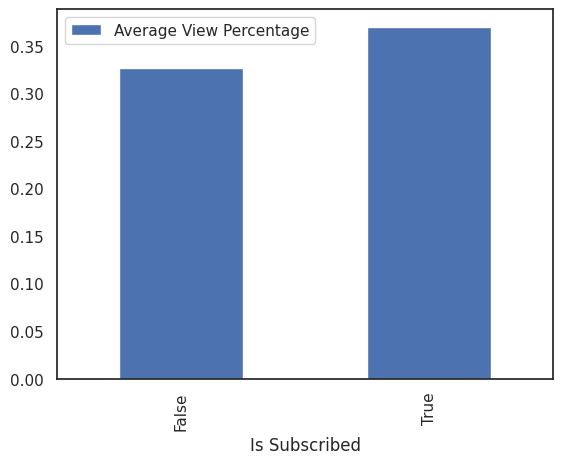

In [167]:
#Let's plot a slightly simpler graph. Let's just look at if subscribers or non-subsribers watch my videos for longer
pd.pivot_table(df_agg_country_sub, index="Is Subscribed", values="Average View Percentage").plot.bar()

### Line Charts
Often, we want to see how variables change over time. Line charts are great for this. Time is an important feature in many models! 

We will use the df_ts dataset for this analys.

In [220]:
# df_ts["Date"] = df_ts['Date'].str.replace(" ", " ")

<Axes: xlabel='Date', ylabel='User Subscriptions Removed'>

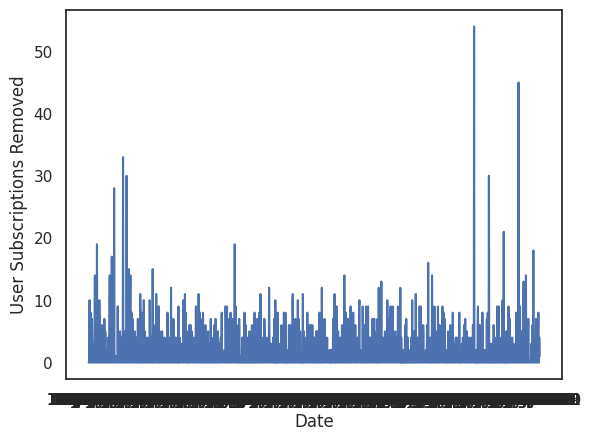

In [208]:

#first, we have to aggregate these by video. We do this with a pivot table.
rm_x_date = pd.pivot_table(df_ts, index='Date',values = 'User Subscriptions Removed', aggfunc ='sum').reset_index()

#next we visualize this data with seaborn 
sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')

In [209]:
#now let's compare this with two other related metrics, video likes removed and dislikes
likes_rm_date = pd.pivot_table(df_ts, index="Date", values = "Video Likes Removed", aggfunc='sum').reset_index()
dislikes_date = pd.pivot_table(df_ts, index="Date", values = "Video Dislikes Added", aggfunc='sum').reset_index()


In [210]:
likes_rm_date

,Date,Video Likes Removed
0,10Apr2018,0
1,10Apr2019,0
2,10Apr2020,0
3,10Apr2021,7
4,10Aug2018,0
...,...,...
1518,9Oct2021,17
1519,9Sept2018,0
1520,9Sept2019,0
1521,9Sept2020,14


In [211]:
dislikes_date

,Date,Video Dislikes Added
0,10Apr2018,0
1,10Apr2019,0
2,10Apr2020,2
3,10Apr2021,7
4,10Aug2018,0
...,...,...
1518,9Oct2021,2
1519,9Sept2018,0
1520,9Sept2019,1
1521,9Sept2020,8


<Axes: xlabel='Date', ylabel='User Subscriptions Removed'>

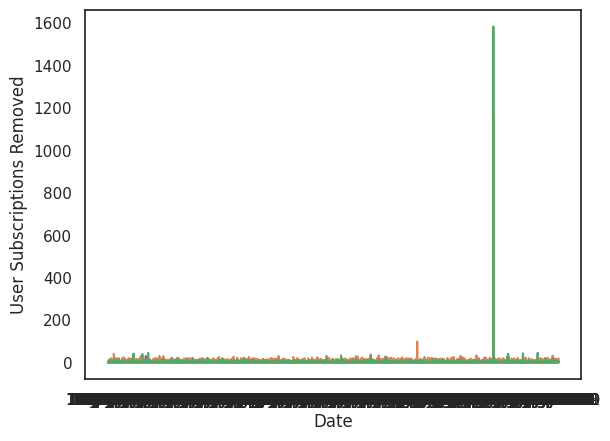

In [212]:
sns.lineplot(data=rm_x_date,x='Date', y='User Subscriptions Removed')
sns.lineplot(data=likes_rm_date,x='Date', y='Video Likes Removed')
sns.lineplot(data=dislikes_date,x='Date', y='Video Dislikes Added')